In [1]:
import numpy as np
from scipy.spatial import KDTree
from matplotlib import pyplot as plt
from IPython.display import Markdown
from IPython.core.debugger import set_trace

# Day 24: Lobby Layout

Reference: https://adventofcode.com/2020/day/24

## Part 1

Your raft makes it to the tropical island; it turns out that the small crab was an excellent navigator. You make your way to the resort.

As you enter the lobby, you discover a small problem: the floor is being renovated. You can't even reach the check-in desk until they've finished installing the new tile floor.

The tiles are all hexagonal; they need to be arranged in a hex grid with a very specific color pattern. Not in the mood to wait, you offer to help figure out the pattern.

The tiles are all white on one side and black on the other. They start with the white side facing up. The lobby is large enough to fit whatever pattern might need to appear there.

A member of the renovation crew gives you a list of the tiles that need to be flipped over (your puzzle input). Each line in the list identifies a single tile that needs to be flipped by giving a series of steps starting from a reference tile in the very center of the room. (Every line starts from the same reference tile.)

Because the tiles are hexagonal, every tile has six neighbors: east, southeast, southwest, west, northwest, and northeast. These directions are given in your list, respectively, as e, se, sw, w, nw, and ne. A tile is identified by a series of these directions with no delimiters; for example, esenee identifies the tile you land on if you start at the reference tile and then move one tile east, one tile southeast, one tile northeast, and one tile east.

Each time a tile is identified, it flips from white to black or from black to white. Tiles might be flipped more than once. For example, a line like esew flips a tile immediately adjacent to the reference tile, and a line like nwwswee flips the reference tile itself.

Here is a larger example:
```
sesenwnenenewseeswwswswwnenewsewsw
neeenesenwnwwswnenewnwwsewnenwseswesw
seswneswswsenwwnwse
nwnwneseeswswnenewneswwnewseswneseene
swweswneswnenwsewnwneneseenw
eesenwseswswnenwswnwnwsewwnwsene
sewnenenenesenwsewnenwwwse
wenwwweseeeweswwwnwwe
wsweesenenewnwwnwsenewsenwwsesesenwne
neeswseenwwswnwswswnw
nenwswwsewswnenenewsenwsenwnesesenew
enewnwewneswsewnwswenweswnenwsenwsw
sweneswneswneneenwnewenewwneswswnese
swwesenesewenwneswnwwneseswwne
enesenwswwswneneswsenwnewswseenwsese
wnwnesenesenenwwnenwsewesewsesesew
nenewswnwewswnenesenwnesewesw
eneswnwswnwsenenwnwnwwseeswneewsenese
neswnwewnwnwseenwseesewsenwsweewe
wseweeenwnesenwwwswnew
```
In the above example, 10 tiles are flipped once (to black), and 5 more are flipped twice (to black, then back to white). After all of these instructions have been followed, a total of 10 tiles are black.

Go through the renovation crew's list and determine which tiles they need to flip. After all of the instructions have been followed, how many tiles are left with the black side up?

In [2]:
#with open('test_tiles_input.txt', 'r') as fid:
with open('tiles_input.txt', 'r') as fid:
    intiles = fid.read().splitlines()

### Strategy

The coordinate system will use a rectangular grid but tile locations
will be restricted to only use points that are part of
a hexagonal tiling. As per the offsets defined below:

In [3]:
# Codes for the possible directions
dir_codes = {'e':'0', 'ne':'1', 'nw':'2',
             'w':'3', 'sw':'4', 'se':'5'}

offsets = {'0': (2, 0), # e
            '1': (1, 2), # ne
            '2': (-1, 2), # nw
            '3': (-2, 0), # w
            '4': (-1, -2), # sw
            '5': (1, -2)} # se


We can see how these points relate to the rectangular grid
plotted here:

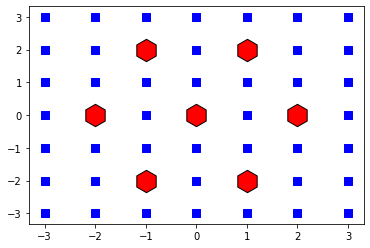

In [4]:
xhex = np.array([xy[0] for xy in offsets.values()] + [0])
yhex = np.array([xy[1] for xy in offsets.values()] + [0])

xg, yg = np.meshgrid(range(-3,4), range(-3,4))

fig, ax = plt.subplots()
ax.scatter(xg.ravel(), yg.ravel(),
           color='blue', s=50,
           marker='s')
ax.scatter(xhex, yhex,
           edgecolors='black',
           color='red',
           s=500, marker='h')
plt.show()

In [5]:
def dir_to_codes(txt):
    # Replace all ocurrences of diagnoal directions with their
    # key code, then 'e' and 'w' can be done without worry
    # about having used an e,w from one of the diagnoal specifiers
    for k in ['ne', 'nw', 'sw', 'se']:
        txt = txt.replace(k, dir_codes[k])
    for k in ['e', 'w']:
        txt = txt.replace(k, dir_codes[k])
    return txt

def codes_to_tups(txt):
    # Convert code string to displacement tuples
    return [offsets[x] for x in txt]

def dir_to_tups(txt):
    # Convert direction string to displacement tuples
    return codes_to_tups(dir_to_codes(txt))

In [6]:
dir_tups = list()
for txt in intiles:
    dir_tups.append(dir_to_tups(txt))

In [7]:
def get_visited_tile(dirtups):
    # Return the visited tile coordinate
    # tuple based on the supplied list
    # of offset tuples supplied in dirtups.
    x, y = (0, 0) # Reference tile
    for dx, dy in dirtups:
        x += dx
        y += dy
    return (x, y)

In [8]:
# Coordinates dictionary of visited tiles
# White = True; Black = False
coords = dict()

for dtups in dir_tups:
    x, y = get_visited_tile(dtups)
    if (x, y) in coords:
        coords[(x, y)] = not(coords[(x, y)])
    else:
        coords[(x, y)] = False

In [9]:
nblack = len(coords) - sum(coords.values())
Markdown("The number of tiles that are left with the black side "
         "up is **{}**".format(nblack))

The number of tiles that are left with the black side up is **495**

## Part 2

The tile floor in the lobby is meant to be a living art exhibit. Every day, the tiles are all flipped according to the following rules:

- Any black tile with zero or more than 2 black tiles immediately adjacent to it is flipped to white.
- Any white tile with exactly 2 black tiles immediately adjacent to it is flipped to black.

Here, tiles immediately adjacent means the six tiles directly touching the tile in question.

The rules are applied simultaneously to every tile; put another way, it is first determined which tiles need to be flipped, then they are all flipped at the same time.

In the above example, the number of black tiles that are facing up after the given number of days has passed is as follows:
```
Day 1: 15
Day 2: 12
Day 3: 25
Day 4: 14
Day 5: 23
Day 6: 28
Day 7: 41
Day 8: 37
Day 9: 49
Day 10: 37

Day 20: 132
Day 30: 259
Day 40: 406
Day 50: 566
Day 60: 788
Day 70: 1106
Day 80: 1373
Day 90: 1844
Day 100: 2208
```
After executing this process a total of 100 times, there would be 2208 black tiles facing up.

How many tiles will be black after 100 days?

In [10]:
xc, yc, vals = ([], [], [])
for (x, y), v in coords.items():
    xc.append(x)
    yc.append(y)
    vals.append(v)

xy = np.array([xc, yc]).T
vals = np.array(vals, dtype=np.uint8)

xy1 = xy.copy()
vals1 = vals.copy()
xytups = set([tuple(c) for c in xy1])

# For each xy coordinate get all possible neighbors. Any missing neighbors
# get added as a white tile.
def get_all_neigh_coords(coord0):
    global offsets2
    return [coord0 + offset for offset in offsets.values()]

def get_missing_neigh_coords(coord0):
    global xy1
    global vals1
    global xytups
    for coord in get_all_neigh_coords(coord0):
        #print(tuple(coord))
        if tuple(coord) not in xytups:
            xy1 = np.append(xy1, [coord], axis=0)
            xytups.add(tuple(coord))
            vals1 = np.append(vals1, 1)
            

Day 1: 343


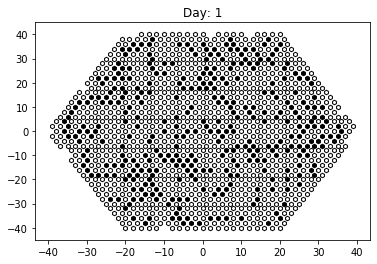

Day 10: 575


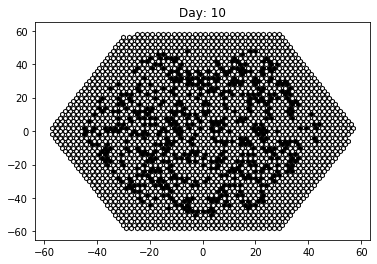

Day 20: 813
Day 30: 1054
Day 40: 1388
Day 50: 1793
Day 60: 2074
Day 70: 2575
Day 80: 3026
Day 90: 3711
Day 100: 4012


In [11]:
def initlifecycle(ncycles=100):
    global xy1
    global vals1
    global xytups
    xy1 = xy.copy()
    vals1 = vals.copy()
    xytups = set([tuple(c) for c in xy1])
    return lifecycle(ncycles)

def lifecycle(ncycles=100):
    global xy1
    global vals1
    global xytups
    makeplot = False
    for iteration in range(ncycles):
        #print(iteration, end='.')
        # Find boundary coordinates based on current
        # snapshot of xy1
        xy2 = xy1.copy()
        for c in xy2:
            # Update xy1, vals1 and xytups with new border coords
            get_missing_neigh_coords(c)
        # --------------
        if iteration == 1 or iteration == 10:
            makeplot = True
        if makeplot:
            fig, ax = plt.subplots()
            zeros = vals1 == 0
            ax.scatter(xy1[zeros][:,0], xy1[zeros][:,1],
                       color='black', s=20,
                       marker='h')
            ones = vals1 == 1
            ax.scatter(xy1[ones][:,0], xy1[ones][:,1],
                       edgecolors='black',
                       color='white',
                       s=20, marker='h')
            ax.set_title("Day: {}".format(iteration))
            #ax.set_xlim(-15, 15)
            #ax.set_ylim(-15, 15)
        # --------------
        vals2 = vals1.copy()
        kd = KDTree(xy1)
        neighs = list()
        for c in xy1:
            n = kd.query(c, 7, distance_upper_bound=2.24)[1][1:]
            #set_trace()
            neighs.append(n)    
        for i, n in enumerate(neighs):
            #if tuple(xy1[i]) == (6, 0):
            #    set_trace()
            nv = vals1[n[n < len(vals1)]]
            nblack = (nv == 0).sum()
            if 0 == vals1[i]:
                # Starts as a black tile
                nvsum = nv.sum()
                if 0 == nblack or 2 < nblack:
                    # Flip the tile
                    vals2[i] = 1
            else:
                # Starts as a white tile
                if 2 == nblack:
                    # Flip the tile
                    vals2[i] = 0
        vals1 = vals2.copy()
        # --------------
        if makeplot:
            #zeros = vals1 == 0
            #ax.scatter(xy1[zeros][:,0], xy1[zeros][:,1],
            #           color='blue', s=150,
            #           marker='h')
            #ones = vals1 == 1
            #ax.scatter(xy1[ones][:,0], xy1[ones][:,1],
            #           edgecolors='black',
            #           color='yellow',
            #           s=150, marker='h')
            plt.show()
            makeplot = False
        # --------------
        if iteration == 0 or iteration % 10 == 9:
            print("Day {}: {}".format(iteration + 1, len(vals1) - sum(vals1)))

    return vals1, xy1

vals1, xy1 = initlifecycle(100)
nblack = len(vals1) - sum(vals1)

In [12]:
Markdown("The number of tiles that will be black after "
         "100 days is **{}**".format(nblack))

The number of tiles that will be black after 100 days is **4012**